# Prediction Using Unsupervised Machine Learning
Unsupervised machine learning uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. In this notebook we will predict the optimum number of clusters that exists in an iris - flower species - data set. To do this we will implement the K-Means clustering algorithm from python's machine learning library, sciki-learn.

## K-Means Clustering
The K-Means Clustering algorithm is an unsupervised machine learning algorithm that divides similar data points within a dataset into a specified number of clusters (K). This is achieved by randomly assigning each data point to one of the K clusters and then iteratively improving the clusters by moving the data points to the cluster center (centroid) that is closest to them. 

The K-Means algorithm is reffered to as a non deterministic algorithm meaning that cluster assignments may vary if you run the same algorithm twice on the same dataset, hence, researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest Sum of Squares Error (SSE).
## Author: Nhlanhla Hlengane
#### Date: 25/04/2023

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [45]:
df = pd.read_csv(r"C:\Users\Nhlan\Desktop\Files\Work\Sparks Foundation\KMeans Clustering\Iris.csv",index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Are there any null values within the dataset?
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Let's take a look at the data to see if there are any relationships betweeen the features. 
For this we use seaborns pairplot function to get a scatter plot matix of the numeric variables in the dataset. 

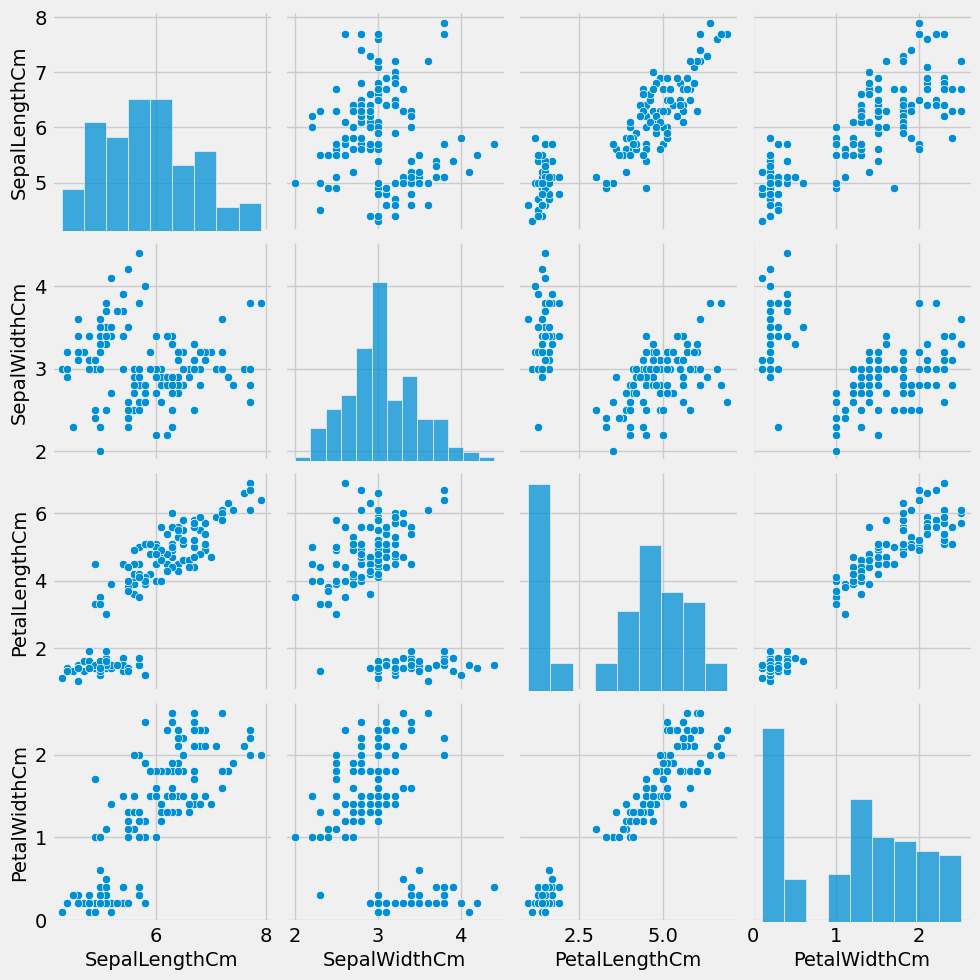

In [19]:
sns.pairplot(df)

It looks like there are some clusters within this dataset, different variable scatterplots result in different clusters. All the variables scatter plots suggest 2 clusters. This is where K-Means shines in helping us determine number of available clusters.  In this case since we're given the species column, let's highlight the different species in different colours to see what we can learn from implementing the K-Means algorithm when we implement it. 

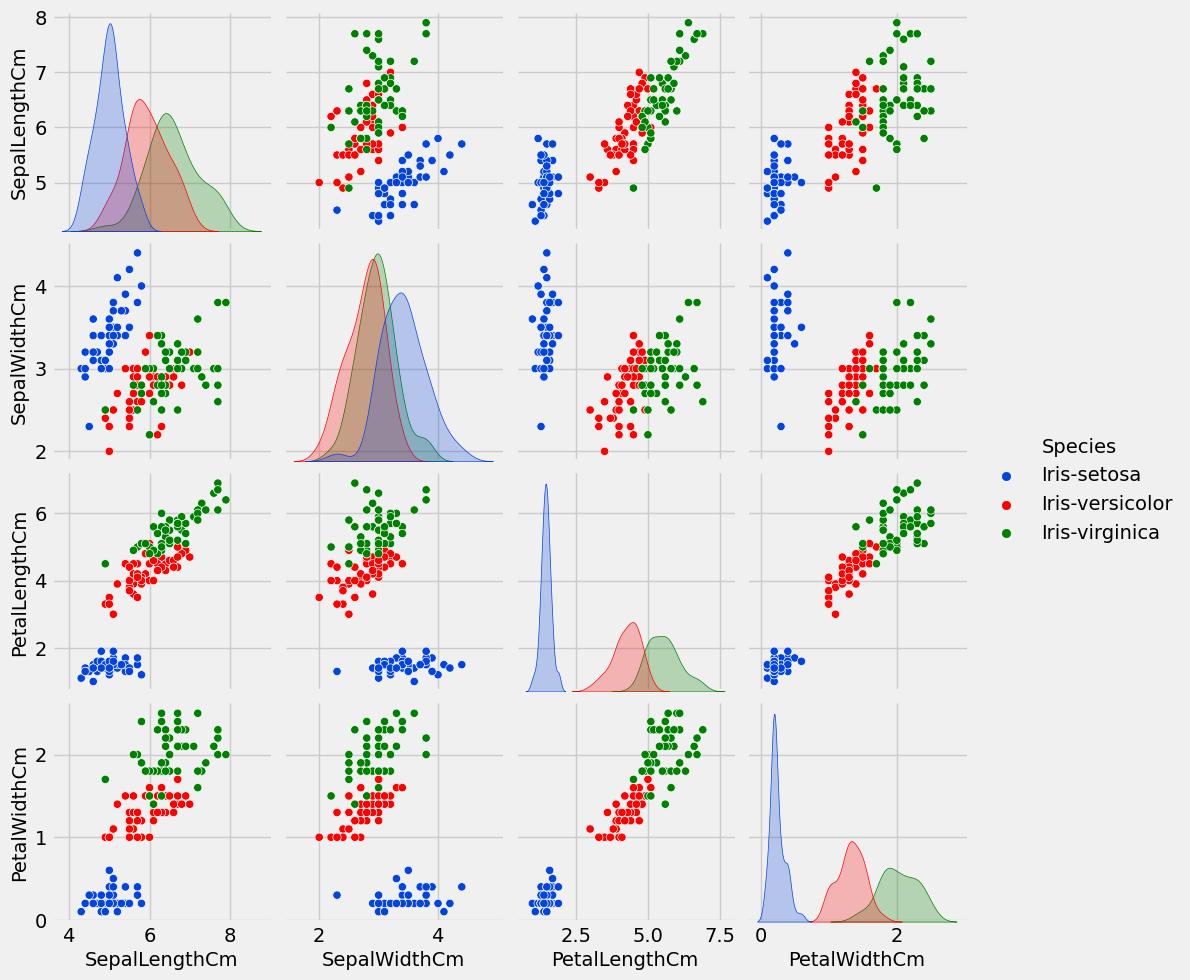

In [20]:
palette = {"Iris-setosa":"#0343DF","Iris-versicolor":"red","Iris-virginica":"green"}
sns.pairplot(df, hue="Species", palette = palette)

In a real world practice we wont be fortunate enough to have a species column when performing an unsupervised learning algorithm on flower species. Fortunately enough, we have that here and we can postulate what we may expect to see from the K-Means clustering algorithm. From the three species it looks like Iris-setosa has more distinct features such as shorter petal length and petal width, and a larger sepal width. The other two species seem closely related but also have features that distinguishes them such as a larger petal width and petal lenth in the Iris-virginica species as compared to Iris-versicolor. 

In [21]:
features = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] #Identifying the features to train the model.
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


### K-Means: Optimum Number of Clusters
To implement the K-Means Clustering algorithm, we need to give a value for the number of clusters to search for. This is the most important part of the algorithm and needs to be handled with care in order to get the most accurate results from the algorithm. There are various methods to achieve this. We will investigate two complementary methods in this section.
1. The Elbow Method
2. The Silhouette coefficient 

Before we get to this, let's rescale our data first. This is an important step commonly known as feature scaling. This data preprocessing step is used to ensure that machine learning algorithms consider all numerical features on the same scale. This is  so that data of different units may have relative significance to improve the accuracy of the model. Using scikit-learn's StandardScalar Class, we can rescale each numerical feature so that it has a mean of 0 and a standard deviation of 1. This is called standardization.

In [22]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_features = Scaler.fit_transform(features) 
scaled_features[:5] # note: Standard Scaler returns a numpy array with a mean of 0 and a standard deviation of 1. 

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

#### The Elbow Method
Now that we have scaled our data, we need to determine the number of clusters in this data. To do this let's first explore the elbow method. The elbow method plots the SSE (commonly known as the inertia) as a funtion of cluster number. The typical trend of this function is that the SSE decreases as the number of clusters increases because the distance from each data point to its closest centroid decreases. The point where this function bends is known as the elbow point and x-value of this point is a reasonable trade off between error and number of clusters. This is where the funtion starts decreasing linearly.

To do this we will initialize the KMeans algorithm to perform 300 iterations on 10 initializations with k clusters and return the inertia from each cluster.

In [23]:
from sklearn.cluster import KMeans
inert = []
clusters = []

for k in range (1,11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scaled_features)
    inert.append(kmeans.inertia_)
    clusters.append(k)


C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [24]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
inert

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.643548109498,
 91.55614687759062,
 81.90100670396319,
 71.30070564118623,
 63.59594510275758,
 56.075917625867596,
 51.00909034289303]

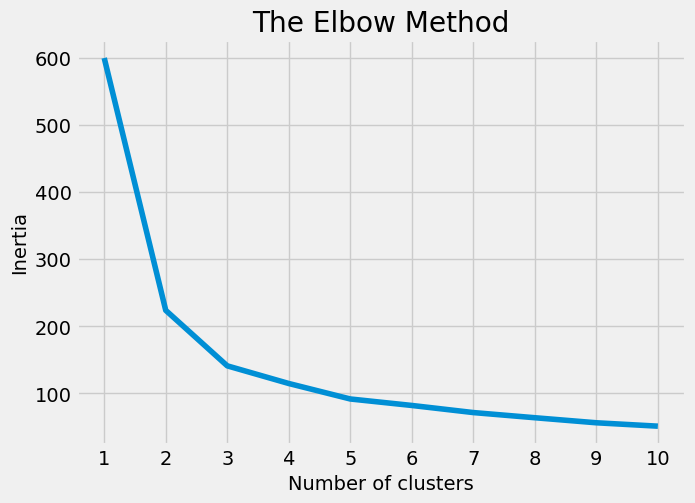

In [26]:
plt.figure(figsize=(7,5))
plt.plot(clusters,inert)
plt.xticks(clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");
plt.title("The Elbow Method")
plt.style.use("fivethirtyeight")
plt.show()

Looking at the graph above, it looks like 3 is the optimum number of cluster. If this isn't obvious, we can use the python package, kneed, to identify  the elbow point. To install this package, use the code below on the anaconda prompt.

In [27]:
#! conda install -c conda-forge kneed

In [28]:
from kneed import KneeLocator
kl=KneeLocator(clusters, inert, curve="convex", direction="decreasing")
print("The elbow obtained from the kneed package is: ",kl.elbow)

The elbow obtained from the kneed package is:  3


#### The Silhouette coefficient
The silhouette coefficient ranges between -1 and 1. It is a measure of how well a data point fits into its assigned cluster based on two factors:
1. How close the data point is to other points in the cluster.
2. How far away the data point is from points in other clusters.

Larger numbers indicate that the samples are closer to their clusters than they are to other clusters. 

To compute the sihouette coefficient we need to initialize the KMeans algorithm again and save the sihouette score for each number (k) of cluster initialization starting from k=2. 

In [29]:
from sklearn.metrics import silhouette_score
# produce a list of silhouette coefficients for each cluster.
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[0.580184463257396,
 0.4589717867018717,
 0.3854851300558946,
 0.37101008810701136,
 0.34467522842184173,
 0.3277897305400625,
 0.3416546971538564,
 0.335727291884248,
 0.3324804034132141]

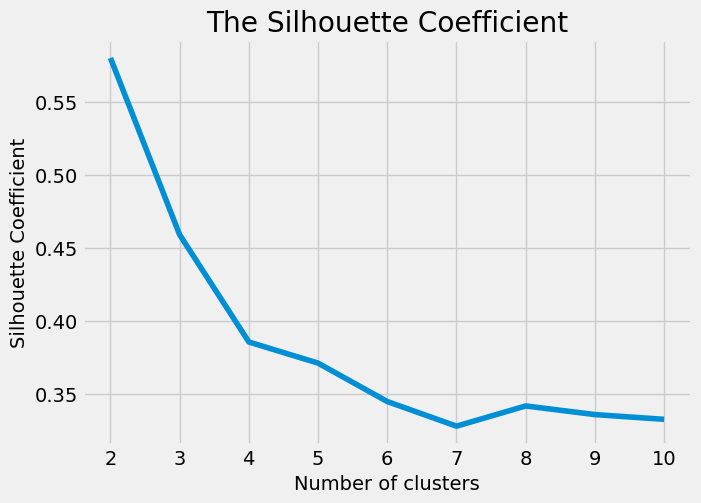

In [30]:
plt.figure(figsize=(7,5))
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("The Silhouette Coefficient")
plt.style.use("fivethirtyeight")
plt.show()

The silhouette coefficient suggests that 2 is the optimum number of clusters as it has the highest score. Looking at the scatterplot matrix, we can see why 2 clusters obtained such a high score. The Iris-setosa species has far more distinct features with almost all data points in this cluster closer towards the data points in this cluster compared to points from other clusters. The function also shows that 3 clusters may also be considerable since this number of clusters has significant score suggesting that there may be clusters that are more closely related than the blue coloured scatterplot matrix and silhouette coefficient score suggests. Hence, when selecting the optimum number of clusters, domain knowlege is needed alongside these techniques for improved accuracy. When implementing the KMeans algorithm we will initialize it with the number of clusters, k=3.

In [31]:
kmeans = KMeans(init="random", n_clusters=3, random_state=0, max_iter=300, n_init=10)
y_pred = kmeans.fit_predict(scaled_features) 
print("Sum of squared error: ",kmeans.inertia_)
kmeans.labels_

C:\Users\Nhlan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sum of squared error:  140.96581663074699


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [32]:
y_pred # y_pred, like kmean.labels, contains labels for the predicted clusters.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [33]:
df_scaled = pd.DataFrame(scaled_features)

In [34]:
df_scaled.columns = features.columns
df_scaled_labelled = pd.concat([df_scaled,pd.Series(y_pred, name="Cluster Label")],axis=1)

df_scaled_labelled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster Label
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,1
148,0.432165,0.800654,0.933356,1.447956,1


### PREDICTED CLUSTERS

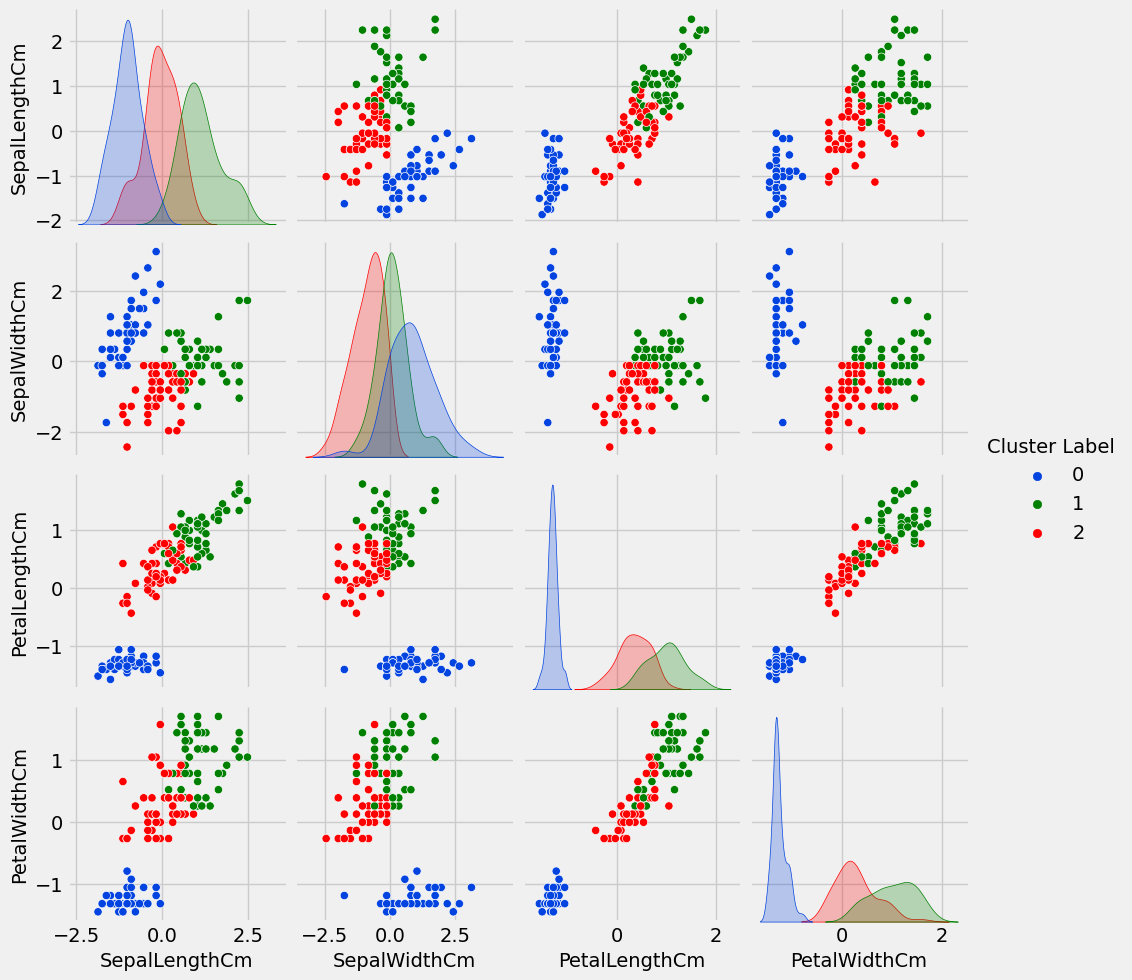

In [35]:
sns.pairplot(df_scaled_labelled,hue="Cluster Label", palette=["#0343DF","green","red"])

We need to change the labels from the original dataset so that the targets are labelled as numbers so we can do an easy comparison between predicted data and original data. We will use sklearn's OrdinalEncoder for this.

In [36]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
new_df = df.copy()
new_df['Species']=ordinal_encoder.fit_transform(np.array(new_df['Species']).reshape(-1,1)).astype('int')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


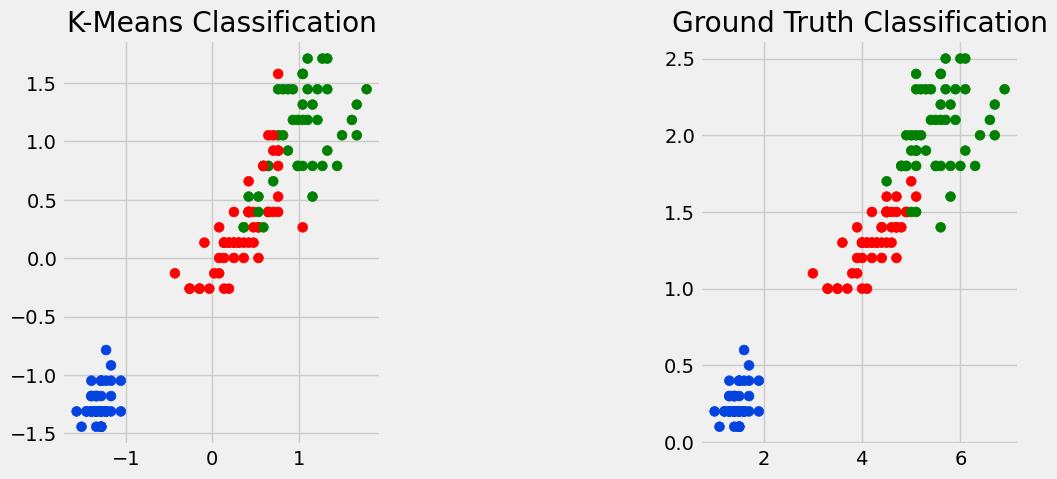

In [38]:
colour_theme = np.array(['#0343DF','green','red'])
#colour_theme_2 = np.array(['#0343DF','red','green']) # relabelling colours
relabel = np.choose(new_df.Species,[0,2,1]).astype(np.int64) # alternatively this is better for classification report 
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(df_scaled_labelled.PetalLengthCm,df_scaled_labelled.PetalWidthCm,
            c=colour_theme[df_scaled_labelled['Cluster Label']],s=50)
plt.title("K-Means Classification")

plt.subplot(1,2,2)
plt.scatter(new_df.PetalLengthCm,new_df.PetalWidthCm,c=colour_theme[relabel],s=50)
plt.title("Ground Truth Classification")
plt.subplots_adjust(wspace=1)
#plt.style.use("seaborn-poster")
plt.show()

### Classification Report

In [39]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(df_scaled_labelled['Cluster Label'],relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.77      0.74        47
           2       0.78      0.74      0.76        53

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### Final Comments
The classification report above shows that our model achieved an 83% average precision rate and 83% average recall rate. The precision is a measure of the model's relevancy and the recall is a measure of the model's completeness. In machine learning, we're always aiming for a high precision and a high recall, this indicates highly accurate model results. Based on the precision column of our classification report, 100% of the data points predicted to have a 0 label (the blue points), are truly relevant. 72% of the points predicted to have a 1 label (the red points), are truly relevant and 78% of the data points predicted to have a 2 label (the green points) are truly relevant. A similar analysis based on the recall metric shows that of the entire dataset, 83% of the predicted data points are relevant, hence this is a good model.